In [1]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
import os

In [3]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


# In this we seen that there are total 8807 rows and 12 column in the data set of netflix.
# In this data many null values in, director	2634 ,cast	825,country	831,date_added	10,rating	4,duration 3 in this all columns.
# In this dataset there is no duplicated values
#  Handle missing values
# Fill missing director, cast, country, rating with "Unknown".
#Drop rows with missing date_added, release_year, or title.
#Parse date_added into a datetime object.
#Convert release_year to integer.
#Split listed_in into individual genres for analysis.
#Standardize type (e.g., "Movie" or "TV Show") and clean duration.



In [8]:
# Data cleanig
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)
df['rating'].fillna('Unknown',inplace=True)
df['duration'].fillna('Unknown',inplace=True)
df=df.dropna(subset=['date_added','release_year','title'])

<ipython-input-8-335e274e56cb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown',inplace=True)
<ipython-input-8-335e274e56cb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [9]:
# Convert data types
df['release_year'] = df['release_year'].astype(int)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Drop rows with invalid dates
df = df.dropna(subset=['date_added'])

<ipython-input-9-27013521b8fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['release_year'].astype(int)
<ipython-input-9-27013521b8fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [10]:
# Clean and split genres
df['listed_in'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])

In [11]:
# Remove any rows with invalid types
df = df[df['type'].isin(['Movie', 'TV Show'])]

In [12]:
# Summary Statistics
print("\n=== Summary Statistics ===")
total_titles = len(df)
movies_count = len(df[df['type'] == 'Movie'])
tv_shows_count = len(df[df['type'] == 'TV Show'])
earliest_year = df['release_year'].min()
latest_year = df['release_year'].max()


=== Summary Statistics ===


In [13]:
print(f"Total Titles: {total_titles}")
print(f"Movies: {movies_count} ({movies_count/total_titles*100:.1f}%)")
print(f"TV Shows: {tv_shows_count} ({tv_shows_count/total_titles*100:.1f}%)")
print(f"Release Year Range: {earliest_year} - {latest_year}")

Total Titles: 8709
Movies: 6131 (70.4%)
TV Shows: 2578 (29.6%)
Release Year Range: 1925 - 2021


In [14]:
# Top 5 Countries
country_counts = Counter()
for countries in df['country']:
    for country in countries.split(','):
        country = country.strip()
        if country != 'Unknown':
            country_counts[country] += 1
top_countries = country_counts.most_common(5)
print("\nTop 5 Countries by Content:")
for country, count in top_countries:
    print(f"{country}: {count} titles")


Top 5 Countries by Content:
United States: 3643 titles
India: 1045 titles
United Kingdom: 787 titles
Canada: 432 titles
France: 389 titles


In [15]:
# Top 5 Genres
genre_counts = Counter()
for genres in df['listed_in']:
    for genre in genres:
        genre_counts[genre] += 1
top_genres = genre_counts.most_common(5)
print("\nTop 5 Genres:")
for genre, count in top_genres:
    print(f"{genre}: {count} titles")


Top 5 Genres:
International Movies: 2752 titles
Dramas: 2427 titles
Comedies: 1674 titles
International TV Shows: 1328 titles
Documentaries: 869 titles


<ipython-input-16-5d07296ff167>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


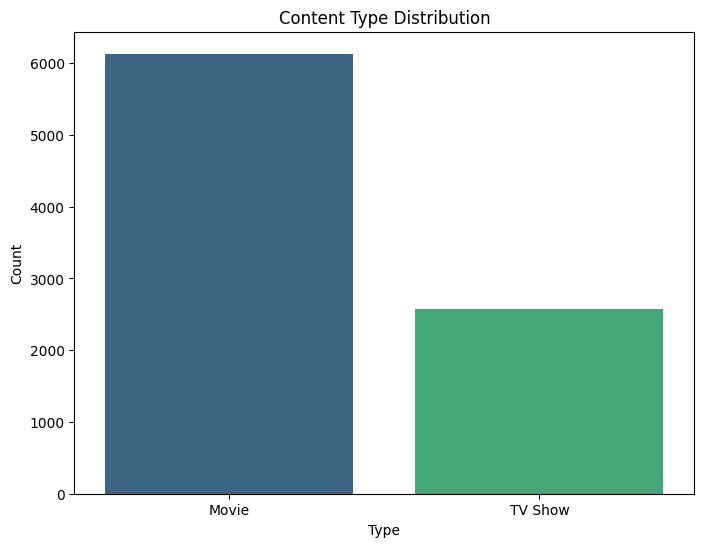

In [16]:
# Content Type Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


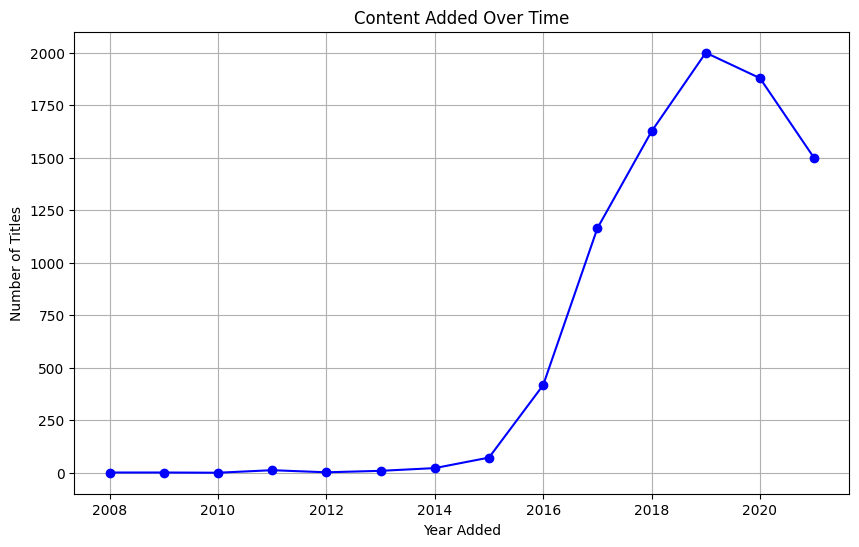

In [17]:
# 2. Content Added Over Time (Line Chart)
df['year_added'] = df['date_added'].dt.year
content_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(content_by_year.index, content_by_year.values, marker='o', color='blue')
plt.title('Content Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)

Text(0.5, 1.0, 'Top 5 Countries by Content')

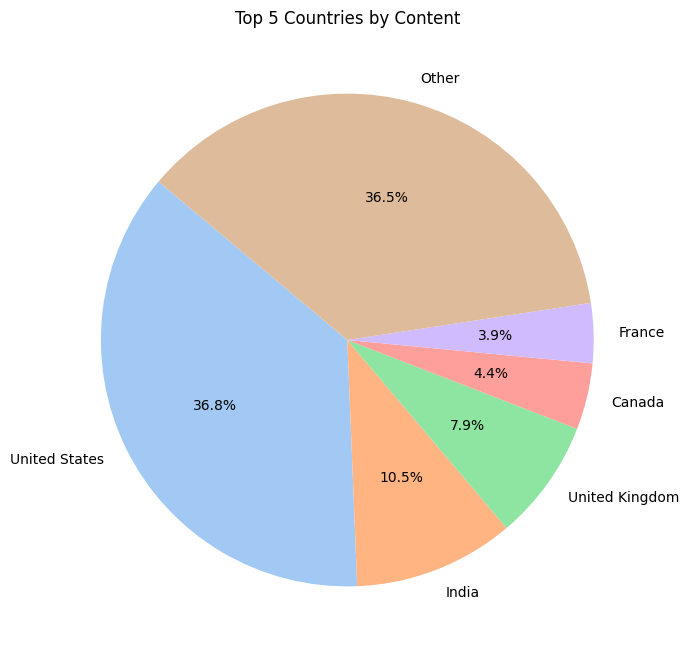

In [18]:
# Top 5 Countries (Pie Chart)
top_countries_dict = dict(top_countries)
other_count = sum(country_counts[c] for c in country_counts if c not in top_countries_dict)
top_countries_dict['Other'] = other_count
labels = top_countries_dict.keys()
sizes = top_countries_dict.values()
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Countries by Content')


<ipython-input-19-4b73c02ab129>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='magma')


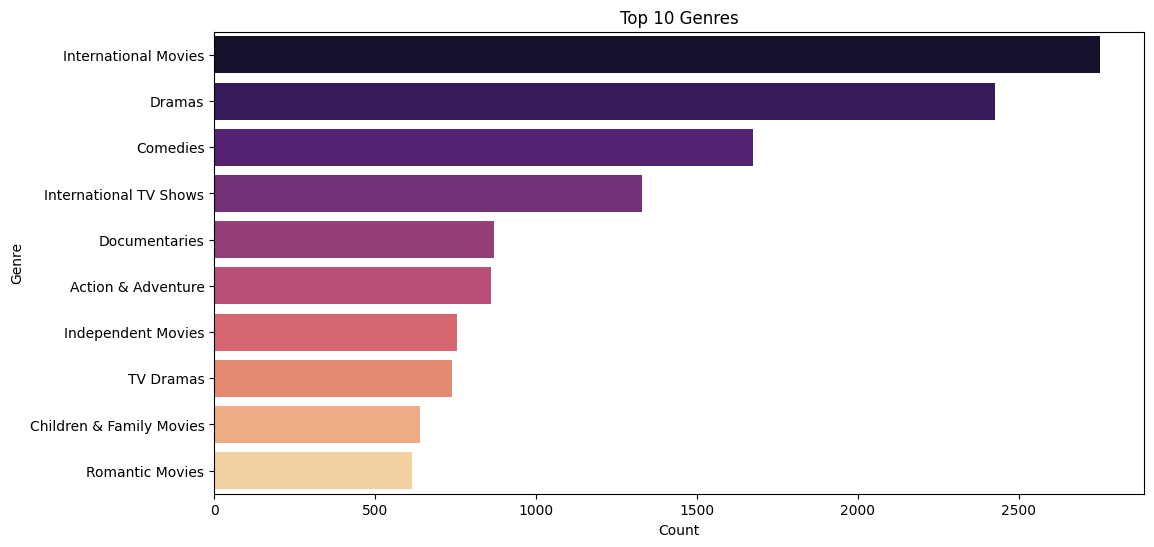

In [19]:
# Top 10 Genres (Bar Chart)
top_10_genres = genre_counts.most_common(10)
genres, counts = zip(*top_10_genres)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(genres), palette='magma')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

<ipython-input-20-b6ae7b2c7e4c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='coolwarm')


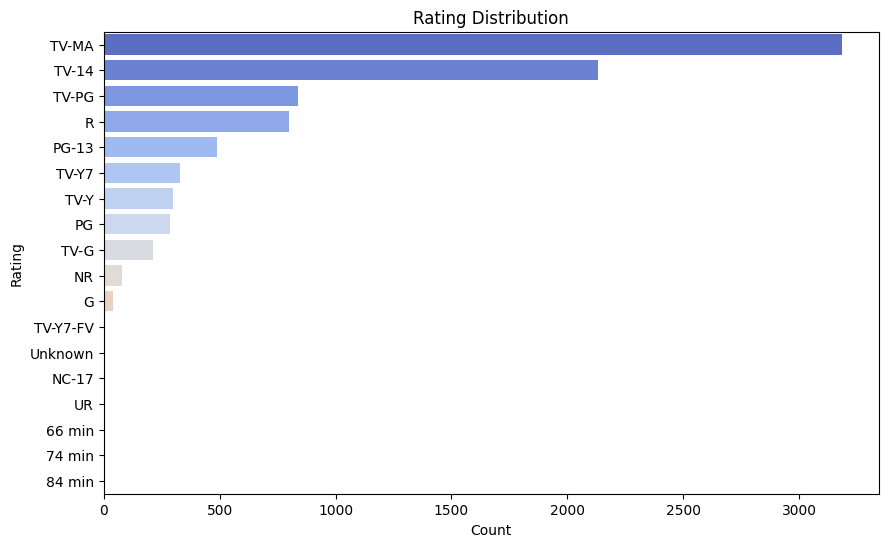

In [20]:
#  Rating Distribution (Bar Chart)
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='coolwarm')
plt.title('Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

In [21]:
# Interesting Fact
print("\n=== Interesting Fact ===")
print("The dataset shows a significant surge in content added between 2016 and 2019 with a peak around 2018. This aligns with Netflix global expansion and increased investment in original content marking a shift from licensing older movies to producing new TV shows.")

# Conclusion
print("\n=== Conclusion ===")
print(f"The Netflix Titles dataset, with {total_titles} titles, reveals a library dominated by movies ({movies_count/total_titles*100:.1f}%) over TV shows. The United States leads in content production, followed by countries like India and the UK. Genres like Dramas and International Movies are prevalent, reflecting Netflix's global appeal. The rating distribution shows a focus on mature audiences (e.g., TV-MA). The surge in content additions during 2016–2019 highlights Netflix's strategic pivot toward original content creation. These insights underscore Netflix's evolution into a global streaming giant catering to diverse viewer preferences.")



=== Interesting Fact ===
The dataset shows a significant surge in content added between 2016 and 2019 with a peak around 2018. This aligns with Netflix global expansion and increased investment in original content marking a shift from licensing older movies to producing new TV shows.

=== Conclusion ===
The Netflix Titles dataset, with 8709 titles, reveals a library dominated by movies (70.4%) over TV shows. The United States leads in content production, followed by countries like India and the UK. Genres like Dramas and International Movies are prevalent, reflecting Netflix's global appeal. The rating distribution shows a focus on mature audiences (e.g., TV-MA). The surge in content additions during 2016–2019 highlights Netflix's strategic pivot toward original content creation. These insights underscore Netflix's evolution into a global streaming giant catering to diverse viewer preferences.


Loading Netflix Titles dataset

Cleaning data...

---Summary Statistics
Total Titles: 8807
Movies: 6131 (69.6%)
TV Shows: 2676 (30.4%)
Release Year Range: 1925 - 2021

---Top 5 Countries by Content:
United States: 2818 titles
India: 972 titles
United Kingdom: 419 titles
Japan: 245 titles
South Korea: 199 titles

---Top 5 Genres:
Dramas: 2427 titles
Comedies: 1674 titles
International Movies: 1351 titles
Documentaries: 869 titles
Action & Adventure: 859 titles

--- Interesting Fact ---
The dataset shows a significant surge in content added between 2016 and 2019, with a peak around 2018. This aligns with Netflix's global expansion and increased investment in original content, marking a shift from licensing older movies to producing new TV shows.

--- Conclusion ---
The Netflix Titles dataset, with 8807 titles, reveals a library dominated by movies (69.6%) over TV shows. The United States leads in content production, followed by countries like India and the UK. Genres like Dramas and International Movies are prevalent, reflecting Netflix global appeal. The rating distribution shows a focus on mature audiences (e.g., TV-MA). The surge in content additions during 2016–2019 highlights Netflix's strategic pivot toward original content creation. These insights underscore Netflix's evolution into a global streaming giant catering to diverse viewer preferences.

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2021
